# Simple benchmark example

In [3]:
import sys, os
module_path = os.path.abspath(os.getcwd()+'/..')

sys.path.append(module_path)
from benchmark.runs.passes import PassesRun
from benchmark.dataset import Dataset
from benchmark.main import Benchmark
from benchmark.runs.pre_encoded import PreEncodedRun
from benchmark.runs.warmup import Warmup
from benchmark.runs.run import Run



/home/delta/miniforge3/envs/llm-efficiency-benchmark/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:

# With encoding
model: str = "EleutherAI/pythia-70m"
dataset: Dataset = Dataset(name="Rowan/hellaswag", split="train", column="ctx")

# Configure runs
warmup : Run = Warmup(model=model, dataset=dataset, passes=100)
run1: Run = PassesRun(model=model, dataset=dataset, passes=1)
run5: Run = PassesRun(model=model, dataset=dataset, passes=5)
run10: Run = PassesRun(model=model, dataset=dataset, passes=10)
run20: Run = PassesRun(model=model, dataset=dataset, passes=20)
run40: Run = PassesRun(model=model, dataset=dataset, passes=40)
run100: Run = PassesRun(model=model, dataset=dataset, passes=100)
run200: Run = PassesRun(model=model, dataset=dataset, passes=200)
run500: Run = PassesRun(model=model, dataset=dataset, passes=500)
run1000: Run = PassesRun(model=model, dataset=dataset, passes=1000)
run2000: Run = PassesRun(model=model, dataset=dataset, passes=2000)


# Configure classes
benchmark = Benchmark(name= "with_encoding", runs=[warmup, run1, run5, run10, run20, run40, run100, run200, run500, run1000, run2000])

benchmark.run()

print(benchmark.collect_results())

The `GPTNeoXSdpaAttention` class is deprecated in favor of simply modifying the `config._attn_implementation`attribute of the `GPTNeoXAttention` class! It will be removed in v4.48
Total progress:   9%|▉         | 1/11 [00:29<04:55, 29.59s/it][codecarbon INFO @ 13:23:18] offline tracker init
[codecarbon WARNING @ 13:23:18] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon WARNING @ 13:23:18] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU

[codecarbon WARNING @ 13:23:19] We saw that you have a 13th Gen Intel(R) Core(TM) i9-13900K but we don't know it. Please contact us.
Total progress:  18%|█▊        | 2/11 [00:31<01:59, 13.22s/it][codecarbon WARNING @ 13:23:20] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon WARNING @ 13:23:20] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detect

{'benchmark_name': 'with_encoding-20241217-132248', 'timestamp': '20241217-135906', 'cpu_count': 32, 'cpu_model': '13th Gen Intel(R) Core(TM) i9-13900K', 'gpu_count': 2, 'gpu_model': '2 x NVIDIA GeForce RTX 3090', 'os': 'Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39', 'country_name': 'Netherlands', 'country_iso_code': 'NLD', 'region': None, 'python_version': '3.11.0', 'codecarbon_version': '2.8.1', 'longtitude': None, 'latitude': None, 'ram_total_size': 62.69314956665039, 'cpu_power': 42.5, 'gpu_power': 34.26853555163637, 'ram_power': 23.509931087493896, 'total_duration': 2140.5059969819995, 'total_cpu_energy': 0.02526982005795353, 'total_gpu_energy': 0.02343872152874, 'total_ram_energy': 0.013974188017074247, 'runs': [{'name': 'passes', 'passes': 1, 'model': 'EleutherAI/pythia-70m', 'dataset': 'Rowan/hellaswag', 'timestamp': '2024-12-17T13:23:20', 'duration': 0.4596478680000473, 'cpu_energy': 5.426218135418203e-06, 'gpu_energy': 4.311392338009201e-06, 'ram_energy': 2.

In [ ]:
# Without encoding
model: str = "EleutherAI/pythia-70m"
dataset: Dataset = Dataset(name="Rowan/hellaswag", split="train", column="ctx")

# Configure runs
# warmup: Run = Warmup(model=model, dataset=dataset, passes=1)

warmup: Run = Warmup(model=model, dataset=dataset, passes=100)
run1: Run = PreEncodedRun(model=model, dataset=dataset, passes=1)
run5: Run = PreEncodedRun(model=model, dataset=dataset, passes=5)
run10: Run = PreEncodedRun(model=model, dataset=dataset, passes=10)
run20: Run = PreEncodedRun(model=model, dataset=dataset, passes=20)
run40: Run = PreEncodedRun(model=model, dataset=dataset, passes=40)
run100: Run = PreEncodedRun(model=model, dataset=dataset, passes=100)
run200: Run = PreEncodedRun(model=model, dataset=dataset, passes=200)
run500: Run = PreEncodedRun(model=model, dataset=dataset, passes=500)

# Configure classes
benchmark = Benchmark([warmup, run1, run5, run10, run20, run40, run100, run200, run500])

benchmark.run()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (9,).

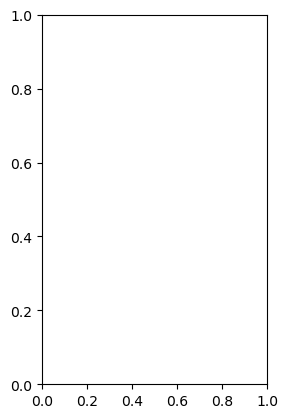

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import json


# Graph data


def data_from_json(file: str, type: str) -> [float]:
    data = json.load(open(file))

    return [data["runs"][0][type], data["runs"][1][type], data["runs"][2][type], data["runs"][3][type], data["runs"][4][type], data["runs"][5][type], data["runs"][6][type], data["runs"][7][type], data["runs"][8][type], data["runs"][9][type]]


x = np.arange(10)

results1 = data_from_json("results_with_encoding-20241217-132248.json", "gpu_energy")
#  results2 = data_from_json("resultsV3.json", "gpu_energy")
#   results3 = data_from_json("results_with_encoding-20241203-174821.json", "gpu_energy")
#   results4 = data_from_json("results_with_encoding-20241203-195144.json", "gpu_energy")
#   results5 = data_from_json("results_with_encoding-20241203-200703.json", "gpu_energy")

ram_energy1 = data_from_json("results_with_encoding-20241217-132248.json", "ram_energy")
#   ram_energy2 = data_from_json("resultsV3.json", "ram_energy")
#   ram_energy3 = data_from_json("results_with_encoding-20241203-174821.json", "ram_energy")
#   ram_energy4 = data_from_json("results_with_encoding-20241203-195144.json", "ram_energy")
#   ram_energy5 = data_from_json("results_with_encoding-20241203-200703.json", "ram_energy")

cpu_energy1 = data_from_json("results_with_encoding-20241217-132248.json", "cpu_energy")
#   cpu_energy2 = data_from_json("resultsV3.json", "cpu_energy")
#   cpu_energy3 = data_from_json("results_with_encoding-20241203-174821.json", "cpu_energy")
#   cpu_energy4 = data_from_json("results_with_encoding-20241203-195144.json", "cpu_energy")
#   cpu_energy5 = data_from_json("results_with_encoding-20241203-200703.json", "cpu_energy")

duration1 = data_from_json("results_with_encoding-20241217-132248.json", "duration")
#   duration2 = data_from_json("resultsV3.json", "duration")
#   duration3 = data_from_json("results_with_encoding-20241203-174821.json", "duration")
#   duration4 = data_from_json("results_with_encoding-20241203-195144.json", "duration")
#   duration5 = data_from_json("results_with_encoding-20241203-200703.json", "duration")


x_values = [1, 5, 10, 20, 40, 100, 200, 500, 1000, 2000]

gpu = np.divide(np.mean([results1], axis=0), x_values)
ram = np.divide(np.mean([ram_energy1], axis=0), x_values)
cpu = np.divide(np.mean([cpu_energy1], axis=0), x_values)
time = np.mean([duration1], axis=0)

x_labels = ["1", "5", "10", "20", "40", "100", "200", "500", "1000", "2000"]
plt.subplot(1, 2, 1)
plt.bar(x-0.2, gpu, color="g", align="center", width=0.2)
plt.bar(x+0.2, ram, color="r", align="center", width=0.2)
plt.bar(x, cpu, color="b", align="center", width=0.2)

plt.xlabel("Passes")
plt.ylabel("GPU Energy")
plt.title("GPU per energy amount")
plt.xticks(x, x_labels)

plt.subplot(1, 2, 2)
plt.bar(x, time)
plt.xticks(x, x_labels)

plt.show()
